In [2]:

# Mathematical and Data Managment
import pandas as pd
from datetime import datetime, timedelta

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage

# Miscellaneous
from functools import partial
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import zipfile
import io
import os

# Settings for plots
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'

#sns.set_style('white')

In [4]:
individual_group_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/Segregation/individual_group_segregation.pkl')
individual_node_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/Segregation/individual_node_segregation.pkl')

In [9]:

def plot_hist(col, df):
    result = [col]
    for cat in [('Izquierda','darkblue',(-0.1,2.5),(0,10000)), ('Derecha','red',(-0.1,5),(0,2250)), ('Centro','forestgreen',(-0.05,1.2),(0,1000))]:
        df_filter = df[df['Political Affiliation'] == cat[0]]
        fig, ax = plt.subplots()
        sns.histplot(df_filter[col], kde=False, ax=ax, color=cat[1], bins=20, alpha = 0.5)
        ax.set_xlim(*cat[2])
        ax.set_ylim(*cat[3])
        plt.close(fig)
        
        # Save the matplotlib figure to a PIL Image object
        buf = io.BytesIO()
        fig.savefig(buf, format='jpg')
        buf.seek(0)
        hist = Image.open(buf)
        
        result.append(hist)
    
    return result

def main(segregation_df):
    
    df = segregation_df.copy()
    cols = list(df.columns[2:])
    save_to_pil = partial(plot_hist, df=df)
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, cols), total=len(cols)))
    return images

if __name__ == '__main__':
    
    images_full = main(individual_node_segregation)
    images_sorted = [x[1:4] for x in sorted(images_full, key=lambda x: x[0])]
    
    with zipfile.ZipFile(zip_file_path, 'w') as myzip:
        for i, img in enumerate(images_sorted):
            # Create an in-memory bytes buffer for the image
            img_byte_arr = io.BytesIO()
            # Save the JPEG image into the bytes buffer
            img[1].save(img_byte_arr, format='PDF')
            # Move to the beginning of the bytes buffer
            img_byte_arr.seek(0)
            # Define an archive name for the image, assuming JPEG format
            archive_name = f'image_{i}.pdf'
            # Add the buffer content as a file to the ZIP
            myzip.writestr(archive_name, img_byte_arr.getvalue())
    
    # Unpack images
    izquierda_hist = [img[0] for img in images_sorted]
    derecha_hist = [img[1] for img in images_sorted]
    centro_hist = [img[2] for img in images_sorted]
    
    output_path = '../Results/Presentacion Trees'  # Specify the output path for the GIF
    izquierda_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_izquierda_pob_vs_other.gif'), save_all=True, append_images=izquierda_hist[1:], optimize=False, duration=250, loop=0)
    centro_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_centro_pob_vs_other.gif'), save_all=True, append_images=centro_hist[1:], optimize=False, duration=250, loop=0)
    derecha_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_derecha_pob_vs_other.gif'), save_all=True, append_images=derecha_hist[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:04<00:00, 15.47it/s]


In [7]:
from PIL import Image
import zipfile
import io

# Assuming 'images' is your list of PIL.JpegImagePlugin.JpegImageFile objects
images = [...]  # Your list of image objects

# Path for the output ZIP file
zip_file_path = 'images.zip'

with zipfile.ZipFile(zip_file_path, 'w') as myzip:
    for i, img in enumerate(izquierda_hist):
        # Create an in-memory bytes buffer for the image
        img_byte_arr = io.BytesIO()
        # Save the JPEG image into the bytes buffer
        img.save(img_byte_arr, format='JPEG')
        # Move to the beginning of the bytes buffer
        img_byte_arr.seek(0)
        # Define an archive name for the image, assuming JPEG format
        archive_name = f'image_{i}.jpg'
        # Add the buffer content as a file to the ZIP
        myzip.writestr(archive_name, img_byte_arr.getvalue())

print(f"Images have been successfully saved to {zip_file_path}")


Images have been successfully saved to images.zip


In [20]:
def plot_hist(col, df):
    result = [col]
    for cat in [('Izquierda','darkblue',(-0.1,2.5),(0,22500)), ('Derecha','red',(-0.1,7),(0,32000)), ('Centro','forestgreen',(-0.1,14),(0,30000))]:
        df_filter = df[df['Political Label'] == cat[0]]
        fig, ax = plt.subplots()
        sns.histplot(df_filter[col], kde=False, ax=ax, color=cat[1], bins=20, alpha = 0.5)
        ax.set_xlim(*cat[2])
        ax.set_ylim(*(0,25000))
        plt.close(fig)
        
        # Save the matplotlib figure to a PIL Image object
        buf = io.BytesIO()
        fig.savefig(buf, format='jpg')
        buf.seek(0)
        hist = Image.open(buf)
        
        result.append(hist)
    
    return result

def main(segregation_df):
    
    df = segregation_df.reset_index()
    cols = list(df.columns[2:])
    save_to_pil = partial(plot_hist, df=df)
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, cols), total=len(cols)))
    return images

if __name__ == '__main__':
    
    images_full = main(individual_group_segregation)
    images_sorted = [x[1:4] for x in sorted(images_full, key=lambda x: x[0])]
    
    # Unpack images
    izquierda_hist = [img[0] for img in images_sorted]
    derecha_hist = [img[1] for img in images_sorted]
    centro_hist = [img[2] for img in images_sorted]
    
    output_path = '../Results/Presentacion Trees'  # Specify the output path for the GIF
    izquierda_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_total_pob_to_izquierda.gif'), save_all=True, append_images=izquierda_hist[1:], optimize=False, duration=250, loop=0)
    centro_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_total_pob_to_centro.gif'), save_all=True, append_images=centro_hist[1:], optimize=False, duration=250, loop=0)
    derecha_hist[0].save(os.path.join(output_path,'Proximity Histograms/histogram_total_pob_to_derecha.gif'), save_all=True, append_images=derecha_hist[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:12<00:00,  4.94it/s]


In [32]:
XD =  individual_group_segregation.loc[(slice(None),'Centro'),:]

In [33]:
XD

,,Proximity index on 2021-04-28,Proximity index on 2021-04-29,Proximity index on 2021-04-30,Proximity index on 2021-05-01,Proximity index on 2021-05-02,Proximity index on 2021-05-03,Proximity index on 2021-05-04,Proximity index on 2021-05-05,Proximity index on 2021-05-06,Proximity index on 2021-05-07,...,Proximity index on 2021-06-20,Proximity index on 2021-06-21,Proximity index on 2021-06-22,Proximity index on 2021-06-23,Proximity index on 2021-06-24,Proximity index on 2021-06-25,Proximity index on 2021-06-26,Proximity index on 2021-06-27,Proximity index on 2021-06-28,Proximity index on 2021-06-29
Node,Political Label,,,,,,,,,,,,,,,,,,,,,
0,Centro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,Centro,NaN,NaN,NaN,6.350988,0.000000,0.000000,2.761735,2.854320,8.525991,3.117377,...,0.0,1.575943,5.846797,4.749665,NaN,5.968853,0.0,0.0,0.000000,0.0
2,Centro,0.000000,NaN,NaN,0.000000,0.000000,NaN,12.888096,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Centro,0.000000,1.541182,2.530906,3.908300,2.301114,1.363481,0.920578,2.568888,0.000000,0.000000,...,0.0,2.101258,0.000000,NaN,0.0,8.953280,NaN,NaN,0.000000,0.0
4,Centro,0.417253,0.000000,1.739998,0.000000,1.150557,0.485084,0.000000,0.733968,0.000000,0.000000,...,NaN,0.000000,3.897865,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36959,Centro,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6.422220,NaN,0.000000,...,NaN,NaN,5.846797,NaN,0.0,NaN,NaN,NaN,11.638155,0.0
36960,Centro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.000000,NaN
36961,Centro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


In [5]:
individual_node_segregation.drop(columns='index',inplace=True)

In [23]:
def create_ranking_df(df, ascending=True, method='min'):
    # Initialize a dictionary to hold our ranked data
    ranked_data = {}
    
    # Loop over the DataFrame's columns and rank each one
    for column in df.columns[2:]:
        ranked_col_name = column[-10:]  # Get Date
        ranked_data[ranked_col_name] = df[column].rank(method=method, ascending=ascending)
    
    # Create a new DataFrame using the ranked data
    ranking_df = pd.DataFrame(ranked_data)
    
    # Set the index of the new DataFrame to match the original DataFrame's index
    ranking_df.index = df.index
    
    return ranking_df.astype('Int32')

individual_ranked_segregation = create_ranking_df(individual_node_segregation)
XD = individual_ranked_segregation.copy()
# XD = XD.transpose()
# XD.set_index(pd.to_datetime(XD.index))
# XD

In [26]:
max_value_rows = pd.DataFrame()

for column in XD.columns:
    max_value = XD[column].max()  # Find the maximum value in the column
    # Filter rows where the column value equals the column's maximum value
    max_rows = XD[XD[column] == max_value]
    # Append these rows to the max_value_rows DataFrame
    max_value_rows = pd.concat([max_value_rows, max_rows], axis=0).drop_duplicates()

# Display the rows that have a maximum value in at least one column
print("\nRows with a maximum value in at least one column:")
max_value_rows


Rows with a maximum value in at least one column:


,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,...,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29
10,22938,<NA>,16981,<NA>,24844,<NA>,20096,24149,1,1,...,<NA>,13040,1,17080,<NA>,14094,15904,14679,1,<NA>
30,22938,15104,1,15237,17321,22603,27298,1,1,1,...,<NA>,18410,1,1,16003,<NA>,1,14679,<NA>,18108
35,22938,1,23146,16913,20947,21578,22139,19397,22010,21146,...,1,1,11567,1,16003,12740,1,14679,16833,<NA>
81,22938,12360,15756,1,24245,1,26969,20607,21862,21037,...,15654,17412,15761,12822,16003,12145,1,12498,12698,17072
86,22938,<NA>,<NA>,1,24417,17154,26279,17952,25272,1,...,<NA>,18410,<NA>,1,<NA>,<NA>,<NA>,<NA>,13545,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35626,1,1,<NA>,1,<NA>,<NA>,1,20607,1,<NA>,...,1,<NA>,1,1,1,1,1,14679,16833,<NA>
35631,1,1,1,1,16575,17099,10432,15176,16231,21146,...,1,1,11567,1,1,12740,1,10445,16833,1
36027,1,<NA>,1,1,1,19380,24486,1,17656,16686,...,<NA>,<NA>,<NA>,<NA>,<NA>,12740,<NA>,<NA>,16833,<NA>
36661,1,1,1,15237,19622,19578,1,1,17656,16686,...,1,<NA>,1,1,<NA>,<NA>,<NA>,<NA>,16833,<NA>


In [11]:
import pandas as pd
import numpy as np

# Sample DataFrame
np.random.seed(0)  # For reproducible output
df = pd.DataFrame(np.random.randint(0, 15, size=(10, 5)), columns=list('ABCDE'))

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Filter rows where any column has a value >= 10
filtered_df = df[df >= 10].any(axis=1)

# Display the filtered DataFrame
print("\nFiltered DataFrame (rows with at least one value >= 10):")
print(df[filtered_df])

Original DataFrame:
    A   B   C  D   E
0  12   5   0  3  11
1   3   7   9  3   5
2   2   4   7  6   8
3   8  12  10  1   6
4   7   7  14  8   1
5   5   9  13  8   9
6   4   3   0  3   5
7  14   0   2  3   8
8   1   3  13  3   3
9  14   7   0  1   9

Filtered DataFrame (rows with at least one value >= 10):
    A   B   C  D   E
0  12   5   0  3  11
3   8  12  10  1   6
4   7   7  14  8   1
5   5   9  13  8   9
7  14   0   2  3   8
8   1   3  13  3   3
9  14   7   0  1   9


Text(0.5, 1.0, 'Assortativity using Number of Rts as weights')

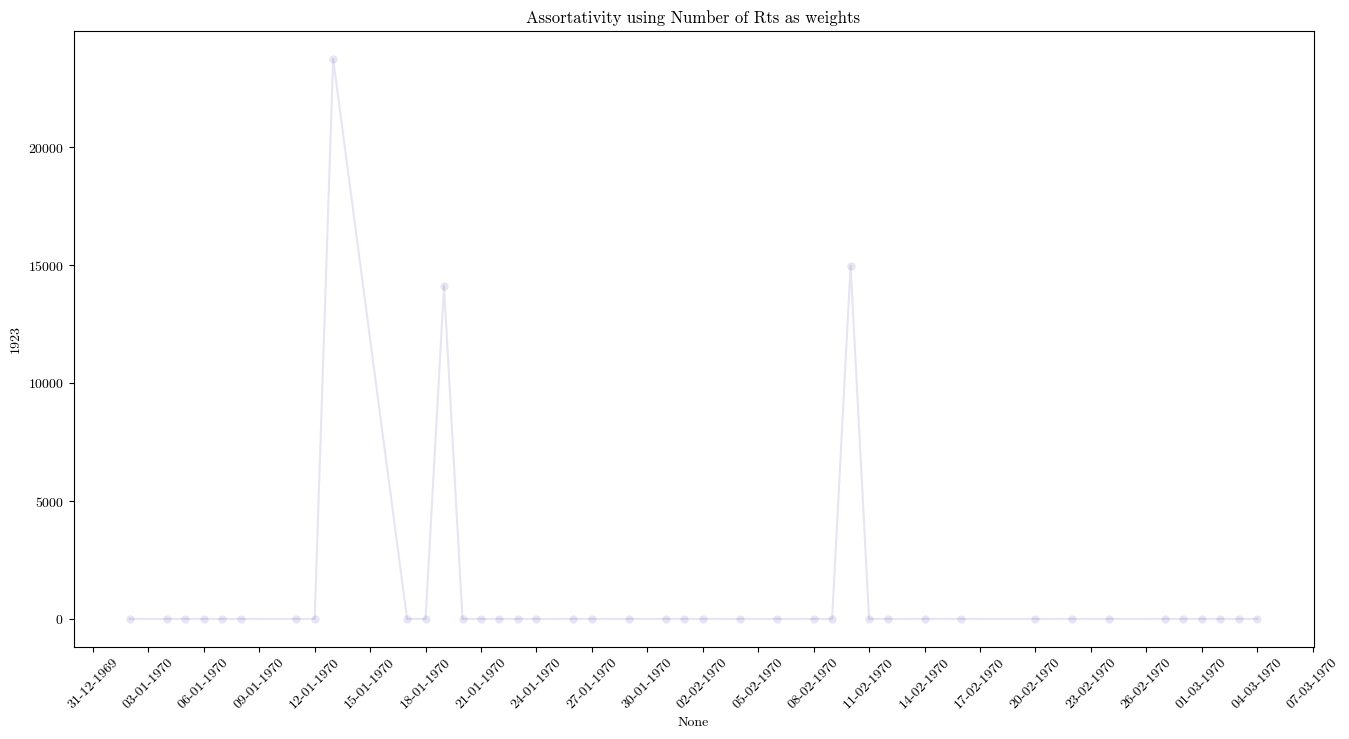

In [75]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(xd, x = xd.index, y =1923,ax=ax, errorbar=None, marker='o', color = 'darkblue', alpha=0.1)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)
plt.title('Assortativity using Number of Rts as weights')

In [82]:
fig, ax = plt.subplots(figsize = (16,8))
xd[xd[xd >= 10].any(axis=1)]

for col in tqdm(xd.columns):
    sns.lineplot(xd, x = xd.index, y = col,ax=ax, errorbar=None, marker='o', color = 'darkblue', alpha=0.03)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)
plt.title('Assortativity using Number of Rts as weights')

 13%|█▎        | 4747/36964 [01:21<09:11, 58.38it/s]


KeyboardInterrupt: 

In [36]:
xd = pd.DataFrame({
    'dia1': [1,2,5,3,],
    'dia2': [3,4,2,5]
})
xd.index = ['a,b,c,d'.split(',')]

In [61]:
individual_node_segregation.drop(columns='index', inplace=True)

In [38]:
lmao = pd.DataFrame({
    'rank dia1': [1,2,4,3],
    'rank dia2': [2,3,1,4]
})
lmao.index = ['a,b,c,d'.split(',')]

In [39]:
lmao

,rank dia1,rank dia2
a,1,2
b,2,3
c,4,1
d,3,4


In [56]:
'Proximity to Others on xxxx-xx-xx'[-10:]

'xxxx-xx-xx'